In [1]:
import gspread
import pandas as pd
from oauth2client.service_account import ServiceAccountCredentials
from pprint import pprint as pp
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [2]:
scope = ["https://spreadsheets.google.com/feeds",'https://www.googleapis.com/auth/spreadsheets',"https://www.googleapis.com/auth/drive.file","https://www.googleapis.com/auth/drive"]

creds = ServiceAccountCredentials.from_json_keyfile_name("creds.json",scope)
client = gspread.authorize(creds)

sheet = client.open("BSE500").worksheet("bse500")
sheet2=client.open("BSE500").worksheet("inex")
sheet3=client.open("BSE500").worksheet("final_1")
sheet4=client.open("BSE500").worksheet("final_2")

In [3]:
# Converting into Dataframe
bse500=sheet.get_all_records()
inex=sheet2.get_all_values()
f_report1=sheet3.get_all_values()
f_report2=sheet4.get_all_values()
df_bse=pd.DataFrame(bse500)
df_inex=pd.DataFrame(inex)

In [4]:
df_bse.head(5)

,Company,BSE code,NSE code,ISIN,Sector,Industry,Date,Price,1 day change(%),52 Week Low,...,Price earnings to growth,Dividend Yield(%),EV / EBITDA,Price / Sales,Price / Cash Flow,Earning Per Share,Book Value Per Share,Cash Flow Per Share,Free Cash Flow Per Share,Dividend Per Share
0,Sanofi India Ltd.,500674,SANOFI,INE058A01010,Healthcare,Drugs & Pharma,2022-09-05,6158.70,0.59,6086.30,...,0.49,7.95,16.68,4.98,25.39,425.09,631.65,242.96,459.22,490.0
1,Page Industries Ltd.,532827,PAGEIND,INE761H01022,Textiles,Readymade Garments,2022-09-05,49786.20,-0.26,31500.00,...,3.63,0.74,51.79,11.75,169.84,656.83,1161.63,293.09,191.03,370.0
2,Procter & Gamble Hygiene & Health Care Ltd.,500459,PGHH,INE179A01014,Consumer Staples,Household & Personal Products,2022-09-05,14125.65,0.24,12801.00,...,13.56,1.13,52.71,12.1,53.17,177.37,227.22,265.9,270.47,315.0
3,Abbott India Ltd.,500488,ABBOTINDIA,INE358A01014,Healthcare,Drugs & Pharma,2022-09-05,18209.00,-1.26,15514.00,...,1.81,1.51,30.98,7.73,40.84,380.52,1403.0,445.96,446.9,275.0
4,Bosch Ltd.,500530,BOSCHLTD,INE323A01026,Automobile,Auto Ancillaries,2022-09-05,17591.10,0.13,12932.45,...,-5.8,1.19,25.04,4.03,192.66,438.11,3734.33,91.29,46.68,210.0


In [5]:
df_inex.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,Date,Account,Category,Subcategory,Note,INR,Income/Expense,Note,Amount,Currency,Account,,,
1,3/2/2022 10:11,CUB - online payment,Food,,Brownie,50,Expense,,50,INR,50,,,
2,3/2/2022 10:11,CUB - online payment,Other,,To lended people,300,Expense,,300,INR,300,,,
3,3/1/2022 19:50,CUB - online payment,Food,,Dinner,78,Expense,,78,INR,78,,,
4,3/1/2022 18:56,CUB - online payment,Transportation,,Metro,30,Expense,,30,INR,30,,,


In [6]:
df_inex=pd.DataFrame(inex)
header_row = df_inex.iloc[0]
df_inex2 = pd.DataFrame(df_inex.values[1:], columns=header_row)
df_inex2["Amount"] = pd.to_numeric(df_inex2["Amount"], downcast="signed")

In [7]:
inc=df_inex2.groupby(df_inex2['Income/Expense'])['Amount'].sum()
inc

Income/Expense
Expense    57918.28
Income     54754.00
Name: Amount, dtype: float64

In [8]:
cat=df_inex2.groupby(df_inex2['Category'])['Amount'].sum()
cat=cat.to_dict() 
cat['Available for investment']=inc['Expense']-inc['Income']
cat['Net Expense']=inc['Expense']
cat['Net Income']=inc['Income']
cat

{'Allowance': 14000.0,
 'Apparel': 3388.0,
 'Beauty': 196.0,
 'Education': 1400.0,
 'Food': 23396.76,
 'Gift': 115.0,
 'Household': 12188.0,
 'Other': 37868.0,
 'Petty cash': 3.0,
 'Salary': 8000.0,
 'Self-development': 400.0,
 'Social Life': 2513.7200000000003,
 'Transportation': 9203.8,
 'Available for investment': 3164.279999999999,
 'Net Expense': 57918.28,
 'Net Income': 54754.0}

In [9]:
for key in cat.keys():
    row=sheet3.find(key).row
    col=sheet3.find(key).col
    sheet3.update_cell(row,col+1,cat[key])
    print('Success')

Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success


In [10]:
cat

{'Allowance': 14000.0,
 'Apparel': 3388.0,
 'Beauty': 196.0,
 'Education': 1400.0,
 'Food': 23396.76,
 'Gift': 115.0,
 'Household': 12188.0,
 'Other': 37868.0,
 'Petty cash': 3.0,
 'Salary': 8000.0,
 'Self-development': 400.0,
 'Social Life': 2513.7200000000003,
 'Transportation': 9203.8,
 'Available for investment': 3164.279999999999,
 'Net Expense': 57918.28,
 'Net Income': 54754.0}

In [11]:
#changing the datatype to float from str
df_bse["10-Year Return(%)"] = pd.to_numeric(df_bse["10-Year Return(%)"], downcast="signed")

#filling the blank values with nan
df_bse['10-Year Return(%)'] = df_bse['10-Year Return(%)'].fillna(0)

# # finding the differnece in in bse500 in new column delta

df_bse['delta']=(df_bse['52 Week High'].sub(df_bse['Price'], axis = 0).div(df_bse['52 Week High']))


In [12]:
#High Risk Taking
high=df_bse[df_bse.delta>0]
high=high[high['Market Cap(Cr)']<2000]
high=high[high['10-Year Return(%)']<8]
high=high.sort_values(by='Dividend Per Share',ascending=False).head().Company
high

Series([], Name: Company, dtype: object)

In [13]:
#  Risk Taking
risk=df_bse[df_bse.delta>0]
risk=risk[risk['Market Cap(Cr)'].between(2000, 5000)]
risk=risk[risk['10-Year Return(%)'].between(8,15)]
risk_taking=risk.sort_values(by='Dividend Per Share',ascending=False).head().Company
risk_taking


320               NCC Ltd.
325       Tata Coffee Ltd.
396    Greaves Cotton Ltd.
430               FDC Ltd.
Name: Company, dtype: object

In [14]:
#Moderate Risk Taking
moderate=df_bse[df_bse.delta>0]
moderate=moderate[moderate['Market Cap(Cr)'].between(5000, 15000)]
moderate=moderate[moderate['10-Year Return(%)'].between(15,20)]
moderate_risk=moderate.sort_values(by='Dividend Per Share',ascending=False).head().Company
moderate_risk

64                              Cyient Ltd.
129                  Birla Corporation Ltd.
131                     Graphite India Ltd.
151                           Symphony Ltd.
163    Chambal Fertilisers & Chemicals Ltd.
Name: Company, dtype: object

In [15]:
# Low Risk Taking
low=df_bse[df_bse.delta>0]
low=low[low['Market Cap(Cr)'] > 15000]
low=low[low['10-Year Return(%)'] > 20]

low_risk=low.head().sort_values(by='Dividend Per Share',ascending=False).head().Company
low_risk

1                 Page Industries Ltd.
3                    Abbott India Ltd.
8                             MRF Ltd.
13    Bajaj Holdings & Investment Ltd.
16     Honeywell Automation India Ltd.
Name: Company, dtype: object

In [16]:
companies=high.tolist()+risk_taking.tolist()+moderate_risk.tolist()+low_risk.tolist()
companies

['NCC Ltd.',
 'Tata Coffee Ltd.',
 'Greaves Cotton Ltd.',
 'FDC Ltd.',
 'Cyient Ltd.',
 'Birla Corporation Ltd.',
 'Graphite India Ltd.',
 'Symphony Ltd.',
 'Chambal Fertilisers & Chemicals Ltd.',
 'Page Industries Ltd.',
 'Abbott India Ltd.',
 'MRF Ltd.',
 'Bajaj Holdings & Investment Ltd.',
 'Honeywell Automation India Ltd.']

In [17]:
final_list=[]
for lis in [high,risk_taking,moderate_risk,low_risk]:
    
    for n in range(5):
        try:
            final_list.append(lis.iloc[n])
        except:
            final_list.append('Nil')
            pass

In [18]:
final_list

['Nil',
 'Nil',
 'Nil',
 'Nil',
 'Nil',
 'NCC Ltd.',
 'Tata Coffee Ltd.',
 'Greaves Cotton Ltd.',
 'FDC Ltd.',
 'Nil',
 'Cyient Ltd.',
 'Birla Corporation Ltd.',
 'Graphite India Ltd.',
 'Symphony Ltd.',
 'Chambal Fertilisers & Chemicals Ltd.',
 'Page Industries Ltd.',
 'Abbott India Ltd.',
 'MRF Ltd.',
 'Bajaj Holdings & Investment Ltd.',
 'Honeywell Automation India Ltd.']

In [86]:
df_bse["Enterprise Value(Cr)"] = pd.to_numeric(df_bse["Enterprise Value(Cr)"], downcast="signed")
df_bse["Dividend Per Share"] = pd.to_numeric(df_bse["Dividend Per Share"], downcast="signed")
df_bse["3-Year Return"] = pd.to_numeric(df_bse["3-Year Return"], downcast="signed")
enterprice=df_bse.groupby(['Sector'])[['Enterprise Value(Cr)']].median()

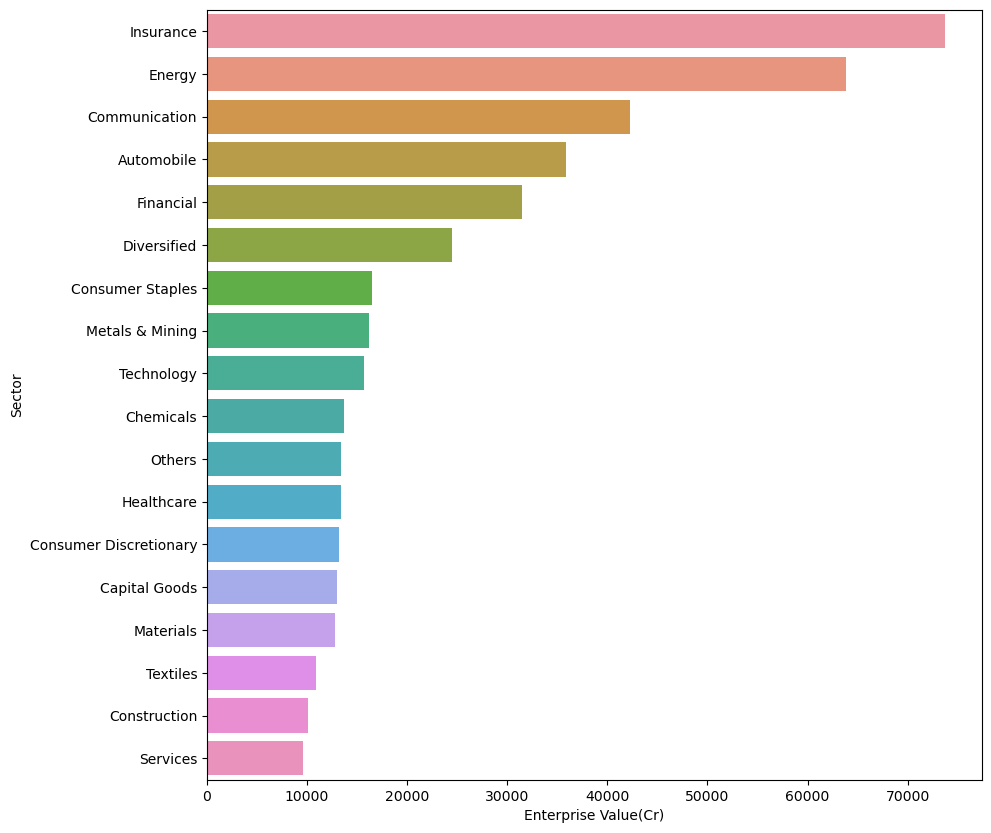

In [20]:
  # comparing median of value od enterprice across different sector
df_bse['Enterprise Value(Cr)']=df_bse['Enterprise Value(Cr)']
median_of_sectors=df_bse[['Sector','Enterprise Value(Cr)']].groupby('Sector').median()
s=median_of_sectors['Enterprise Value(Cr)'].sort_values(ascending=False)
plt.figure(figsize=(10,10))
plt.xlabel('Enterprise Value(Cr)')
plt.ylabel('Sector')
sns.barplot(y=s.index,x=s.values)
plt.show()  

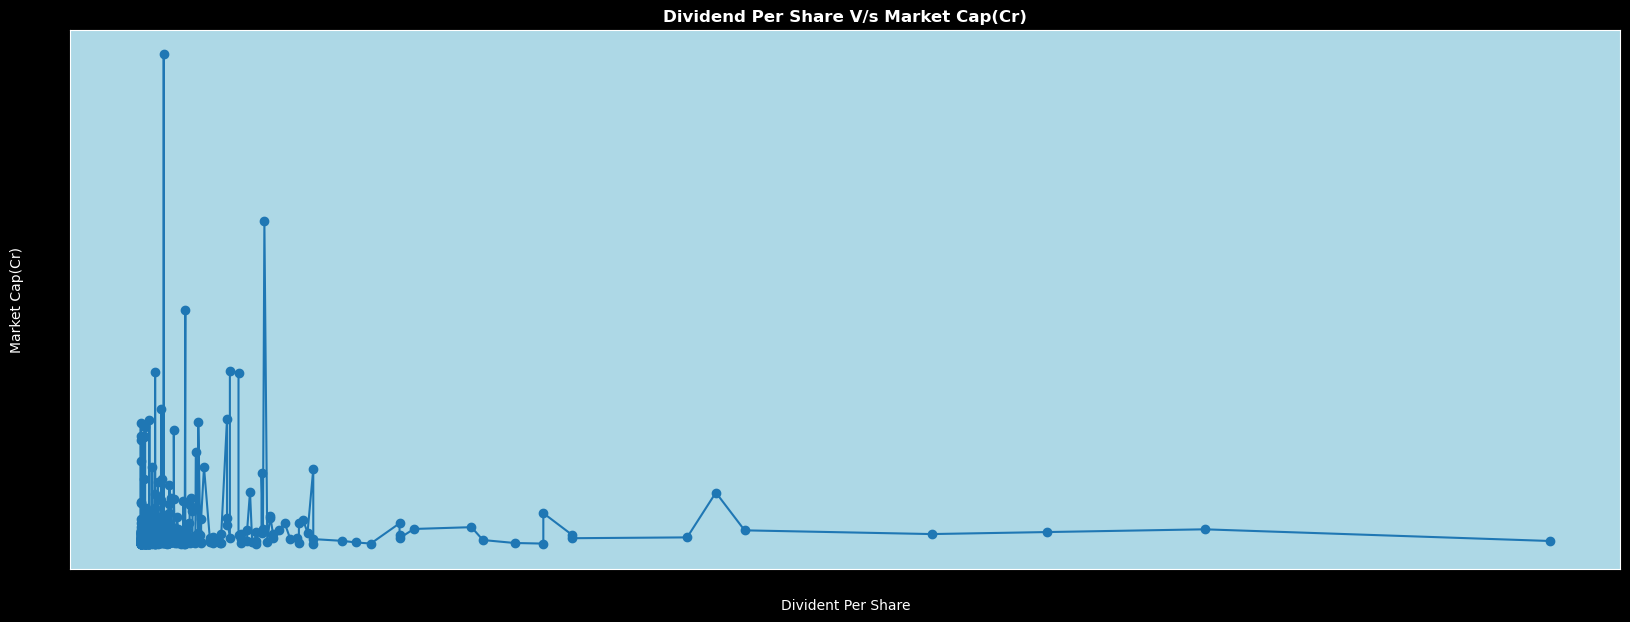

In [87]:

df_bse['Dividend Per Share']=df_bse['Dividend Per Share']
plt.figure(figsize=(20,7),edgecolor='white',facecolor='black')
ax=plt.axes()

ax.set_facecolor('lightblue')
plt.scatter(df_bse['Dividend Per Share'],df_bse['Market Cap(Cr)'])
plt.plot(df_bse['Dividend Per Share'],df_bse['Market Cap(Cr)'])
plt.rcParams['axes.edgecolor'] = 'white'
plt.xlabel('Divident Per Share',color='white')
plt.ylabel('Market Cap(Cr)',color='white')
plt.title('Dividend Per Share V/s Market Cap(Cr)', fontweight='bold',color='white')
plt.show()

In [22]:
df_bse

,Company,BSE code,NSE code,ISIN,Sector,Industry,Date,Price,1 day change(%),52 Week Low,...,Dividend Yield(%),EV / EBITDA,Price / Sales,Price / Cash Flow,Earning Per Share,Book Value Per Share,Cash Flow Per Share,Free Cash Flow Per Share,Dividend Per Share,delta
0,Sanofi India Ltd.,500674,SANOFI,INE058A01010,Healthcare,Drugs & Pharma,2022-09-05,6158.70,0.59,6086.30,...,7.95,16.68,4.98,25.39,425.09,631.65,242.96,459.22,490.0,0.279073
1,Page Industries Ltd.,532827,PAGEIND,INE761H01022,Textiles,Readymade Garments,2022-09-05,49786.20,-0.26,31500.00,...,0.74,51.79,11.75,169.84,656.83,1161.63,293.09,191.03,370.0,0.033278
2,Procter & Gamble Hygiene & Health Care Ltd.,500459,PGHH,INE179A01014,Consumer Staples,Household & Personal Products,2022-09-05,14125.65,0.24,12801.00,...,1.13,52.71,12.1,53.17,177.37,227.22,265.9,270.47,315.0,0.142153
3,Abbott India Ltd.,500488,ABBOTINDIA,INE358A01014,Healthcare,Drugs & Pharma,2022-09-05,18209.00,-1.26,15514.00,...,1.51,30.98,7.73,40.84,380.52,1403.0,445.96,446.9,275.0,0.239214
4,Bosch Ltd.,500530,BOSCHLTD,INE323A01026,Automobile,Auto Ancillaries,2022-09-05,17591.10,0.13,12932.45,...,1.19,25.04,4.03,192.66,438.11,3734.33,91.29,46.68,210.0,0.086177
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496,Westlife Development Ltd.,505533,WESTLIFE,INE274F01020,Services,Restaurants,2022-09-05,650.05,0.82,402.30,...,0.00,34.06,7.81,59.43,3.55,30.99,10.94,1.29,0.0,0.049009
497,Wockhardt Ltd.,532300,WOCKPHARMA,INE049B01025,Healthcare,Drugs & Pharma,2022-09-05,242.70,3.01,201.50,...,0.00,20.5,1.18,8.48,-20.7,260.73,28.68,8.54,0.0,0.506757
498,Yes Bank Ltd.,532648,YESBANK,INE528G01035,Financial,Banking,2022-09-05,16.65,2.78,10.80,...,0.00,23.87,2.13,1.77,0.47,13.61,9.42,7.86,0.0,0.069832
499,Zomato Ltd.,543320,ZOMATO,INE758T01015,Services,E-Commerce,2022-09-05,59.65,-0.17,40.60,...,0.00,-40.17,10.71,-73.58,-1.21,23.01,-0.91,-1.16,0.0,0.647250


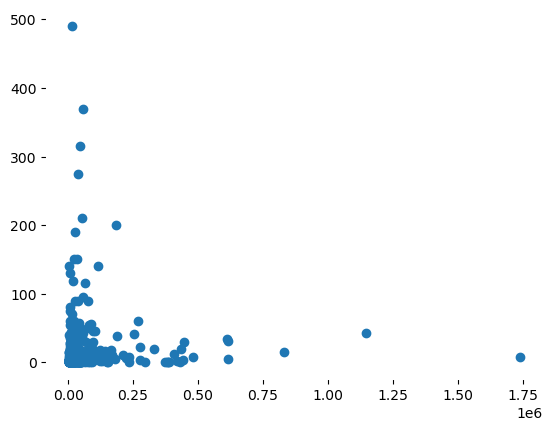

In [88]:
plt.scatter(data=df_bse, y="Dividend Per Share", x="Market Cap(Cr)")

In [77]:
industry=df_bse[['Industry','3-Year Return']]


In [89]:
industry

,Industry,3-Year Return
0,Drugs & Pharma,0.16
1,Readymade Garments,41.31
2,Household & Personal Products,11.82
3,Drugs & Pharma,24.18
4,Auto Ancillaries,9.51
...,...,...
496,Restaurants,32.95
497,Drugs & Pharma,4.16
498,Banking,-34.57
499,E-Commerce,


In [99]:
industry['positive']=[ 1  if x > 0.0  for x in industry['3-Year Return'] ]

SyntaxError: invalid syntax (1804067822.py, line 1)

In [100]:
industry['positive'] = industry['3-Year Return'] >0
    

TypeError: '>' not supported between instances of 'str' and 'int'

In [91]:
industry.fillna(0)

,Industry,3-Year Return
0,Drugs & Pharma,0.16
1,Readymade Garments,41.31
2,Household & Personal Products,11.82
3,Drugs & Pharma,24.18
4,Auto Ancillaries,9.51
...,...,...
496,Restaurants,32.95
497,Drugs & Pharma,4.16
498,Banking,-34.57
499,E-Commerce,


In [115]:
industry.groupby(['Industry'])[''.count()


,3-Year Return
Industry,
ACs & Refrigerators,6
Abrasives,2
Air Transport,2
Aluminium,2
Aquaculture,1
...,...
Tyres & Tubes,4
Vegetable oils,1
Welding machinery,1


In [107]:
industry['3-Year Return'].dtype

dtype('O')

In [109]:
industry.dropna()

,Industry,3-Year Return
0,Drugs & Pharma,0.16
1,Readymade Garments,41.31
2,Household & Personal Products,11.82
3,Drugs & Pharma,24.18
4,Auto Ancillaries,9.51
...,...,...
496,Restaurants,32.95
497,Drugs & Pharma,4.16
498,Banking,-34.57
499,E-Commerce,


In [110]:
industry['3-Year Return'] = pd.to_numeric(industry['3-Year Return'],errors='coerce')

C:\Users\Sunny\AppData\Local\Temp\ipykernel_1376\1343947481.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  industry['3-Year Return']=pd.to_numeric(industry['3-Year Return'],errors='coerce')


In [114]:
industry['3-Year Return'].dtype

dtype('float64')